<a href="https://colab.research.google.com/github/jjgl0540-hub/Leeds_Energy_Project_GEOG5415M/blob/main/notebooks/GEOG5415M_Final_Project_202018307_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GEOG5415M Final Assignment

Student ID number:202018307

In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import geopandas as gpd


# **Introduction & Data Sources**

This project develops a spatial data analysis workflow to identify variations in energy vulnerability across Leeds. While national energy support policies in the UK are often income-based, they may overlook households that face high energy costs due to poor building efficiency rather than low income alone.

Previous research has shown significant spatial differences in residential energy efficiency across England, with Energy Performance Certificate (EPC) ratings closely correlated with local socioeconomic conditions (Buyuklieva et al., 2023<a href="#ref1">[1]</a>). To overcome the limitations of income-based approaches alone, recent research has shifted to multidimensional and comprehensive frameworks, such as the Low Income Low Energy Efficiency (LILEE) concept and spatiotemporal energy vulnerability indices, to better capture the complexity of energy vulnerability (Georgiadou et al., 2024<a href="#ref2">[2]</a>; Ward et al., 2025<a href="#ref2">[5]</a>.)

Building upon existing literature, this study employs a carefully simplified and easily interpretable framework that integrates EPC-based housing energy efficiency with regional poverty (IMD). The study focuses on spatial patterns at the LSOA scale, aiming to provide clear and policy-relevant evidence to support precise, region-based energy policy development, rather than replicating comprehensive national indicators.

Leeds was chosen as a case study due to its diverse housing types and clearly defined LSOA geographic scope, making it well-suited for fine-scale spatial analysis. The findings are intended to provide insights for more targeted and practical local energy policy interventions.


**Research aim**

This project examines the spatial distribution of cold-related vulnerability by jointly considering economic deprivation and housing energy efficiency, using a composite cold index, bivariate classification, and local spatial clustering analysis.

**Research questions**

RQ1: How do economic deprivation and housing energy efficiency jointly shape cold-related vulnerability?

RQ2: Can neighbourhoods be classified into policy-relevant area types based on these dimensions?

RQ3: Do high cold-index areas form statistically significant local clusters?

**Data Sources:**

*   EPC Data: Domestic Energy Performance Certificates (EPC), sourced from the Department for Levelling Up, Housing and Communities (DLUHC).
https://epc.opendatacommunities.org/login

*   IMD Data: English Indices of Deprivation (2019), published by MHCLG and accessed via ONS Nomis.
https://assets.publishing.service.gov.uk/media/5dc407b440f0b6379a7acc8d/File_7_-_All_IoD2019_Scores__Ranks__Deciles_and_Population_Denominators_3.csv

*   LSOA Boundaries: Sourced from the ONS Geoportal.
https://geoportal.statistics.gov.uk/datasets/68515293204e43ca8ab56fa13ae8a547_0/explore?location=52.771926%2C-2.489483%2C7





# **Programming Workflow & Data preparation**

The programming workflow for this project consists of three stages: data preparation and data visualization. This chapter focuses on the data preparation stage, covering the loading, cleaning, aggregation, and integration of multi-source data.



**3.1 Data Loading**

Data from multiple sources exhibit inconsistencies in structure, identifiers, and spatial reference systems, issues that need to be addressed through a standardized loading and verification process prior to analysis.




In [2]:
# load the data
epc  = pd.read_csv("epc_leeds_2025.csv")
imd  = pd.read_csv("imd_2019.csv")
lsoa = gpd.read_file("LSOA_2021_EW_BGC_V5.shp")

/tmp/ipython-input-46407388.py:2: DtypeWarning: Columns (15,37,39,40,83) have mixed types. Specify dtype option on import or set low_memory=False.
  epc  = pd.read_csv("epc_leeds_2025.csv")


**3.2 Spatial Linkage**

In [3]:
# after loading each dataset, basic data integrity checks (such as structure and completeness) were performed.
# this demonstration shows the checks performed on the EPC dataset.

# check the key columns to confirm the existence of energy efficiency rating variables
# required to be aggregated to the LSOA level later.
epc.head()

,LMK_KEY,ADDRESS1,ADDRESS2,ADDRESS3,POSTCODE,BUILDING_REFERENCE_NUMBER,CURRENT_ENERGY_RATING,POTENTIAL_ENERGY_RATING,CURRENT_ENERGY_EFFICIENCY,POTENTIAL_ENERGY_EFFICIENCY,...,CONSTITUENCY_LABEL,POSTTOWN,CONSTRUCTION_AGE_BAND,LODGEMENT_DATETIME,TENURE,FIXED_LIGHTING_OUTLETS_COUNT,LOW_ENERGY_FIXED_LIGHT_COUNT,UPRN,UPRN_SOURCE,REPORT_TYPE
0,001dca82162cbdf798f746f53027c0cc82afda971d5e84...,Flat 2,35a Town Street,Farsley,LS28 5HX,10003805692,E,C,42,70,...,Pudsey,PUDSEY,England and Wales: before 1900,2022-12-06 16:54:30,Rented (private),9.0,NaN,72736113.0,Energy Assessor,100
1,18a413eb393a87aaccdcbbc35d75c519a13bf9713e5d8d...,8 Sackville Street,NaN,NaN,LS7 2AS,10003489215,D,B,61,82,...,Leeds North East,LEEDS,England and Wales: 1900-1929,2022-10-03 15:40:47,Rented (private),12.0,NaN,72658276.0,Energy Assessor,100
2,18ad988b1d1a739e5adfd04531c27c63e7ea810f40c31d...,20 Highfield Gardens,NaN,NaN,LS12 4DU,10003423919,C,B,72,86,...,Leeds West,LEEDS,England and Wales: 2007-2011,2022-10-25 07:49:22,Rented (social),6.0,NaN,72683080.0,Energy Assessor,100
3,18bd4432597b334e2d8031b1ded0e4d713f2133e939b89...,17 Chestnut Gardens,NaN,NaN,LS12 4LP,10002989904,B,A,88,92,...,Leeds West,Leeds,England and Wales: 1983-1990,2022-10-06 16:09:42,Owner-occupied,7.0,NaN,72266470.0,Address Matched,100
4,275687798052018050310193492080467,"9, Foxwood Farm Way",NaN,NaN,LS8 3EE,4759821668,D,B,58,87,...,Leeds East,LEEDS,England and Wales: 1983-1990,2018-05-03 10:19:34,owner-occupied,NaN,NaN,72269527.0,Address Matched,100


A critical issue identified during inspection was the absence of LSOA codes in the raw EPC dataset. To resolve this, this study adopted a postcode-based linkage strategy. A lookup table (ONSPD) was utilized to map individual postcodes to their corresponding LSOA codes.

In [4]:
# load postcode-to-LSOA lookup (robust to malformed rows)
lookup = pd.read_csv("PCD_OA21_LSOA21.csv", usecols=["pcds", "lsoa21cd"],dtype=str, engine="python",on_bad_lines="skip")

# standardise column names
lookup = lookup.rename(columns={"pcds": "postcode", "lsoa21cd": "lsoa_code"})

# clean postcode to match EPC format
lookup["postcode_clean"] = (lookup["postcode"].str.upper().str.replace(" ", "", regex=False))

# keep only fields needed for joining
lookup = lookup[["postcode_clean", "lsoa_code"]]

In [5]:
# clean epc postcodes for reliable matching (uppercase + remove spaces)
epc["postcode_clean"]=(epc["POSTCODE"].astype(str).str.upper().str.replace(" ", "", regex=False))

# add lsoa_code to epc dataset
epc=epc.merge(lookup,on="postcode_clean",how="left")

# check the match rate
print(epc['lsoa_code'].notna().mean())

# randomly select several samples
epc[['POSTCODE', 'postcode_clean', 'lsoa_code']].sample(10, random_state=42)

0.9988389184944723


,POSTCODE,postcode_clean,lsoa_code
12561,LS7 2QE,LS72QE,E01011450
26108,LS7 3ER,LS73ER,E01011360
281043,LS28 5LW,LS285LW,E01011593
317456,LS18 4DH,LS184DH,E01011465
4183,LS4 2NG,LS42NG,E01011479
181626,LS12 1DH,LS121DH,E01033015
111460,LS16 7AT,LS167AT,E01011384
396899,LS20 9EY,LS209EY,E01011279
22246,LS10 3SQ,LS103SQ,E01032498
205074,LS3 1BX,LS31BX,E01035045


**3.3 Data Aggregation**

All attribute datasets are spatially joined with the official LSOA boundary file.
As EPC data contains residential-level energy efficiency information, which needs to be aggregated to the LSOA level for spatial comparison with the census data at first. The mean current energy efficiency score is used as the summary indicator, enabling integrated analysis across different spatial scales.

In [6]:
# convert the EPC energy efficiency column to numerical values ​​(for calculating the average)
for c in ["CURRENT_ENERGY_EFFICIENCY", "POTENTIAL_ENERGY_EFFICIENCY"]:
    if c in epc.columns:
        epc[c]=pd.to_numeric(epc[c], errors="coerce")

In [7]:
# re-aggregate and analyze the scores of individual buildings according to LSOA partitions
# aggregate EPC records by LSOA
# remove EPC records without LSOA code
epc_clean=epc.dropna(subset=["lsoa_code"])

# group EPC records by LSOA
epc_grouped=epc_clean.groupby("lsoa_code")

# summarise building-level EPC indicators at the LSOA level
epc_lsoa = epc_grouped.agg(mean_current_eff=("CURRENT_ENERGY_EFFICIENCY", "mean"),mean_potential_eff=("POTENTIAL_ENERGY_EFFICIENCY", "mean"),n_properties=("LMK_KEY", "count"))

# convert the group index (lsoa_code) back to a normal column
epc_lsoa = epc_lsoa.reset_index()

In [8]:
# standardise LSOA identifiers to enable consistent joins across census tables
imd=imd.rename(columns={"LSOA code (2011)": "lsoa_code"})

In [9]:
# define Leeds LSOA boundaries (baseline)
lsoa_leeds = lsoa[lsoa["LSOA21NM"].str.startswith("Leeds", na=False)].copy()
lsoa_leeds = lsoa_leeds.rename(columns={"LSOA21CD": "lsoa_code"})

leeds_codes = lsoa_leeds["lsoa_code"].unique()
print("Leeds LSOAs (baseline):", len(leeds_codes))  # expect 488


Leeds LSOAs (baseline): 488


In [10]:
# keep EPC records within Leeds
epc_leeds = epc[epc["lsoa_code"].isin(leeds_codes)].copy()
print("EPC rows in Leeds:", len(epc_leeds))

EPC rows in Leeds: 416190


In [11]:
# keep EPC records with a valid LSOA code
epc_leeds_clean = epc_leeds.dropna(subset=["lsoa_code"]).copy()

# aggregate EPC indicators to LSOA level
epc_grouped = epc_leeds_clean.groupby("lsoa_code", as_index=False)
epc_lsoa = epc_grouped.agg(mean_current_eff=("CURRENT_ENERGY_EFFICIENCY", "mean"), mean_potential_eff=("POTENTIAL_ENERGY_EFFICIENCY", "mean"),n_properties=("LMK_KEY", "count"))

print("Leeds LSOAs with EPC:", epc_lsoa["lsoa_code"].nunique())


Leeds LSOAs with EPC: 488


In [12]:
# subset national IMD to Leeds LSOAs (based on the 2021 Leeds boundary codes)
imd_leeds = imd[imd["lsoa_code"].isin(leeds_codes)].copy()

# some LSOAs may not match due to 2011 vs 2021 boundary differences
print("Leeds LSOAs with IMD matched:", imd_leeds["lsoa_code"].nunique())

Leeds LSOAs with IMD matched: 473


The IMD index covers most of LSOAs in Leeds (473/488). Due to the difference between the 2011 and 2021 LSOA boundaries, a few regions could not be matched, and the relevant regions were preserved but their IMD values ​​are missing.

Final LSOAs (geometry): 488
Share with EPC: 1.0
Share with IMD: 0.9692622950819673


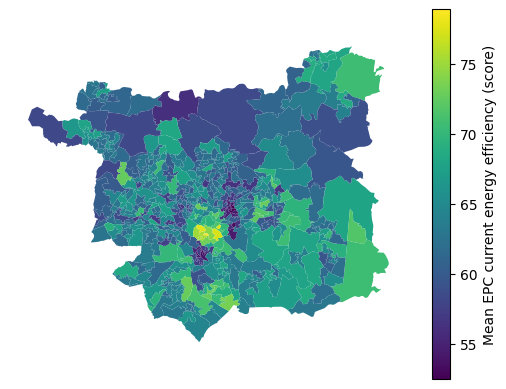

In [13]:
# merge IMD and EPC indicators onto the Leeds LSOA boundary (spatial unit = 488 LSOAs)
lsoa_geo = lsoa_leeds.copy()

# keep all Leeds LSOAs even if IMD cannot be matched for a small number of areas (2011 vs 2021 boundaries)
lsoa_geo = lsoa_geo.merge(imd_leeds, on="lsoa_code", how="left")

# attach aggregated EPC indicators at LSOA level
lsoa_geo = lsoa_geo.merge(epc_lsoa, on="lsoa_code", how="left")

# quick sanity checks
print("Final LSOAs (geometry):", lsoa_geo["lsoa_code"].nunique())  # should be 488
print("Share with EPC:", lsoa_geo["mean_current_eff"].notna().mean())
# (optional) replace with your IMD column name
print("Share with IMD:", lsoa_geo["Income Score (rate)"].notna().mean())

ax = lsoa_geo.plot(column="mean_current_eff",legend=True,legend_kwds={"label": "Mean EPC current energy efficiency (score)"})

# remove x/y axes for cleaner map output
ax.set_axis_off()

This map demonstrates the complete spatial coverage and alignment of all 488 LSOAs.

In [14]:
# check missing EPC values after spatial merge
lsoa_geo[["mean_current_eff", "mean_potential_eff", "n_properties"]].isna().sum()

,0
mean_current_eff,0
mean_potential_eff,0
n_properties,0


In [15]:
# check space merging status
lsoa_geo.geometry.is_valid.all()

np.True_

Final checks confirmed that spatial alignment remained consistent across the 488 Leeds Regional Small Area Statistical Units (LSOAs) covering the full EPC data.

**3.4 Exploratory check of raw variables**

To better understand the limitations of using a single indicator, an exploratory check was conducted to examine the relationship between income deprivation and housing energy efficiency at the LSOA level. The figure presents a scatter plot of the income deprivation score against mean EPC current efficiency.

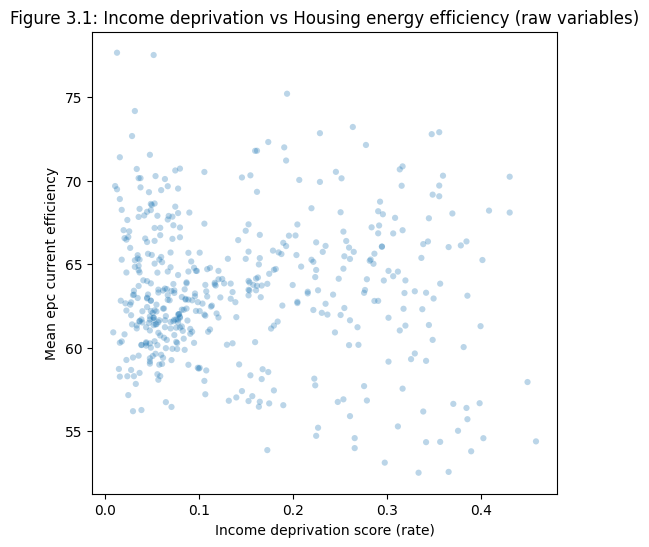

In [16]:
# create a scatter plot: income deprivation score vs mean epc current efficiency
# goal: visually check whether higher income deprivation tends to be associated with poorer energy efficiency

fig, ax = plt.subplots(figsize=(6, 6))

# each point represents one lsoa
# x = income deprivation score (rate)
# y = mean epc current efficiency for the lsoa
ax.scatter(lsoa_geo["Income Score (rate)"],lsoa_geo["mean_current_eff"],alpha=0.3,s=20,edgecolors="none")

ax.set_xlabel("Income deprivation score (rate)")
ax.set_ylabel("Mean epc current efficiency")

ax.set_title("Figure 3.1: Income deprivation vs Housing energy efficiency (raw variables)")

plt.show()



The scatter shows substantial dispersion and no clear linear relationship, suggesting that income deprivation alone is insufficient to characterise variation in housing energy efficiency across areas.


# **Visualisation & Interpretation**

**4.1 Economic vs physical dimensions of cold-related risk**

Building on the observation that income deprivation alone does not adequately capture variation in housing energy efficiency, this section adopts a multidimensional perspective to examine cold-related vulnerability. This section uses scatter plots of standardized indicators (z-scores) to analyze the joint distribution of economic poverty and housing physical inefficiency at the LSOA level. The zero reference line represents the average situation, thus dividing each region into four quadrants.

For ease of comparison, income poverty and housing energy efficiency are standardized using z-scores, where the energy efficiency values ​​are inverted so that higher values ​​represented greater physical vulnerability.

In [17]:
# define column names used throughout the analysis
PHYSICAL_COL = "mean_current_eff"
ECON_COL     = "Income Score (rate)"
LSOA_NAME_COL = "LSOA21NM"

In [18]:
# prepare a clean GeoDataFrame for analysis
# remove missing geometries
required_cols = [PHYSICAL_COL, ECON_COL, "geometry"]
missing = []
for c in required_cols:
    if c not in lsoa_geo.columns:
        missing.append(c)

if len(missing) > 0:
    raise KeyError(f"Missing columns: {missing}")

# keep only relevant fields
lsoa_risk_gdf = lsoa_geo.copy()
lsoa_risk_gdf = lsoa_risk_gdf[lsoa_risk_gdf.geometry.notnull()].copy()
lsoa_risk_gdf = lsoa_risk_gdf[[LSOA_NAME_COL, PHYSICAL_COL, ECON_COL, "geometry"]].copy()

In [19]:
# standardise indicators for comparability
# energy efficiency is reversed so higher values indicate higher vulnerability
def zscore(s):
    return (s - s.mean()) / s.std()

# standardise variables so they are comparable
lsoa_risk_gdf["phys_poverty_z"] = zscore(-lsoa_risk_gdf[PHYSICAL_COL])
lsoa_risk_gdf["econ_poverty_z"] = zscore(lsoa_risk_gdf[ECON_COL])

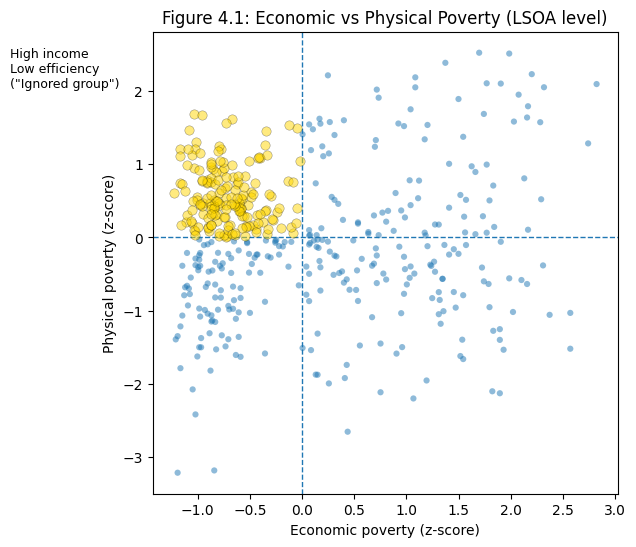

In [20]:
fig, ax = plt.subplots(figsize=(6, 6))

# define ignored group (upper-left quadrant)
ignored = lsoa_risk_gdf[(lsoa_risk_gdf["econ_poverty_z"] < 0) & (lsoa_risk_gdf["phys_poverty_z"] > 0)]

# background points = everything except ignored
rest = lsoa_risk_gdf[~((lsoa_risk_gdf["econ_poverty_z"] < 0) & (lsoa_risk_gdf["phys_poverty_z"] > 0))]

# plot background
ax.scatter(rest["econ_poverty_z"], rest["phys_poverty_z"],alpha=0.5, s=20,edgecolors="none", linewidths=0,zorder=1)

# reference lines at mean (z=0)
ax.axhline(0, linestyle="--", linewidth=1)
ax.axvline(0, linestyle="--", linewidth=1)

# plot highlighted group
ax.scatter(ignored["econ_poverty_z"], ignored["phys_poverty_z"],color="gold", alpha=0.5, s=45,edgecolors="black", linewidths=0.3,zorder=3)

ax.set_xlabel("Economic poverty (z-score)")
ax.set_ylabel("Physical poverty (z-score)")
ax.set_title("Figure 4.1: Economic vs Physical Poverty (LSOA level)")

ax.text(-2.8, 2.6, "High income\nLow efficiency\n(\"Ignored group\")", fontsize=9, ha="left", va="top")

plt.show()

The figure reveals that economic and physical poverty are only weakly correlated overall. Notably, a distinct cluster of LSOAs appears in the upper-left quadrant, characterised by relatively high income levels but poor housing energy efficiency. These areas would be overlooked by income-based targeting alone, motivating the construction of a composite cold risk index that captures overlapping vulnerabilities more effectively.

Previous research has shown that similar patterns are associated with rental-dominated communities where tenants have limited control over housing upgrades and landlords have little incentive to invest in energy efficiency improvements, especially in the absence of regulatory pressure (Häkkinen & Belloni, 2011<a href="#ref2">[3]</a>; Bouzarovski & Tirado Herrero, 2017<a href="#ref2">[4]</a>).

**4.2 Construction of the Cold Index**

The Cold Index is defined as the arithmetic mean of standardized economic and physical vulnerability indicators, with each dimension weighted equally. The formula reflects the combined impact of income constraints and housing conditions on cold-related risks and is consistent with the UK's definition of fuel poverty under the Low Income Low Energy Efficiency (LILEE) framework.

In [21]:
# combine physical and economic poverty into a single index
lsoa_risk_gdf["cold_index"] = (lsoa_risk_gdf["phys_poverty_z"] + lsoa_risk_gdf["econ_poverty_z"]) / 2

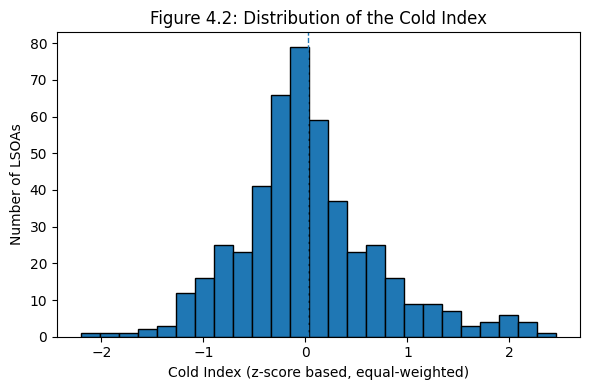

In [22]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6, 4))

# drop missing values to avoid plotting issues
cold_index_values = lsoa_risk_gdf["cold_index"].dropna()

ax.hist(cold_index_values, bins=25, edgecolor="black")
ax.axvline(cold_index_values.mean(), linestyle="--", linewidth=1)

ax.set_title("Figure 4.2: Distribution of the Cold Index")
ax.set_xlabel("Cold Index (z-score based, equal-weighted)")
ax.set_ylabel("Number of LSOAs")

plt.tight_layout()
plt.show()


The figure presents the distribution of the Cold Index across LSOAs, showing meaningful variation prior to spatial analysis in Section 3.3.

**4.3 Spatial patterns of cold-related vulnerability**

Building upon the coldness index, this section explores the spatial distribution of cold-related vulnerabilities in Leeds. First, a bivariate hierarchical statistical map is used to investigate the combined spatial structure of economic and physical poverty, highlighting different vulnerability combinations at the LSOA level. This descriptive mapping focuses on the structure and composition of risk rather than statistical significance. Subsequently, the Local Moran's I index is applied to the coldness index to assess whether there is significant spatial clustering of overall cold-related vulnerabilities.

**4.3.1 Static Map: Bivariate Choropleth**

While the Cold Index provides a continuous overview of joint vulnerability, this section employs bivariate contour plots to decompose its underlying dimensions and reveal the spatial distribution of different combinations of economic and physical poverty. Both indices are divided into three quantile-based groups (k = 3) to ensure balanced sample sizes across groups while avoiding excessive dispersion.

In [23]:
econ_var = ECON_COL

# higher EPC efficiency = lower vulnerability
#　use -eff to make higher values = higher physical poverty
lsoa_risk_gdf["physical_poverty"] = -lsoa_risk_gdf[PHYSICAL_COL]
phys_var = "physical_poverty"

In [24]:
# set the bivariate class resolution —— 3x3
# k = 3 divides each dimension into low / medium / high groups
# avoiding over-fragmentation
k = 3

# create quantile-based classes for each variable
# pd.qcut splits data into k quantiles (roughly equal counts)
# labels=False returns 0..(k-1); +1 converts them to 1..k
# duplicates="drop" avoids errors when tied values cause non-unique bin edges

lsoa_risk_gdf["ECON_q"] = ( pd.qcut(lsoa_risk_gdf[econ_var], q=k, labels=False, duplicates="drop") + 1)
lsoa_risk_gdf["PHYSICAL_q"] = (pd.qcut(lsoa_risk_gdf[phys_var], q=k, labels=False, duplicates="drop") + 1)

In [25]:
# ensure class columns keep missing values properly
# using pandas "Int64" (capital I) keeps NA as <NA> instead of converting to float
lsoa_risk_gdf["ECON_q"] = lsoa_risk_gdf["ECON_q"].astype("Int64")
lsoa_risk_gdf["PHYSICAL_q"] = lsoa_risk_gdf["PHYSICAL_q"].astype("Int64")


In [26]:
# build bivariate code + define three headline risk types
# bivariate class code:
#   econ is the row (1..k), physical is the column (1..k)
#   results in 1..k^2 (e.g., for k=3 -> 1..9)
lsoa_risk_gdf["bi_class"] = (lsoa_risk_gdf["ECON_q"] - 1) * k + lsoa_risk_gdf["PHYSICAL_q"]

# define headline risk types
# assumption: higher quantile = worse
# only three extreme combinations are explicitly labelled for interpretation;
# remaining combinations are grouped as "Other".
lsoa_risk_gdf["risk_type"] = "Other"
lsoa_risk_gdf.loc[(lsoa_risk_gdf["ECON_q"] == k) & (lsoa_risk_gdf["PHYSICAL_q"] == k),"risk_type"] = "A: double poverty"
lsoa_risk_gdf.loc[(lsoa_risk_gdf["ECON_q"] == 1) & (lsoa_risk_gdf["PHYSICAL_q"] == k),"risk_type"] = "B: physical only"
lsoa_risk_gdf.loc[(lsoa_risk_gdf["ECON_q"] == k) & (lsoa_risk_gdf["PHYSICAL_q"] == 1), "risk_type"] = "C: economic only"


In [27]:
# setup an manual matrices to avoid extra dependencies
# rows: economic poverty (low=1 -> high=k)
# cols: physical poverty (low=1 -> high=k)
palette = [ ["#e8e8e8", "#ace4e4", "#5ac8c8"],
        ["#dfb0d6", "#a5add3", "#5698b9"],
        ["#be64ac", "#8c62aa", "#3b4994"],]

In [28]:
# map (ECON_q, PHYSICAL_q) to a colour for each LSOA
# missing class values are assigned a neutral grey for plotting
na_color = "#d9d9d9"

def pick_colour(row):
    econ_q = row["ECON_q"]
    phys_q = row["PHYSICAL_q"]

    # if either dimension is missing, use the NA colour
    if pd.isna(econ_q) or pd.isna(phys_q):
        return na_color

    # convert class labels (1..k) to list indices (0..k-1) and pick colour
    return palette[int(econ_q) - 1][int(phys_q) - 1]

# apply the colour assignment row by row
lsoa_risk_gdf["bi_color"] = lsoa_risk_gdf.apply(pick_colour, axis=1)

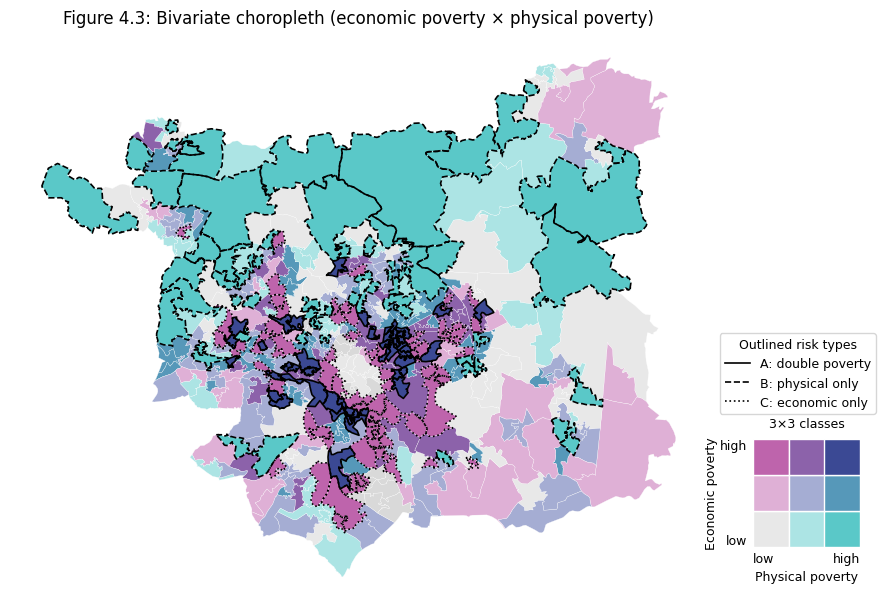

In [29]:
# create bivariate choropleth
fig, ax = plt.subplots(1, 1, figsize=(9, 9))

lsoa_risk_gdf.plot(ax=ax,color=lsoa_risk_gdf["bi_color"], edgecolor="white",linewidth=0.2)

ax.set_title("Figure 4.3: Bivariate choropleth (economic poverty × physical poverty)", fontsize=12)
ax.set_axis_off()

# highlight three headline risk types (outline only)
# A: solid, B: dashed, C: dotted
lsoa_risk_gdf.loc[lsoa_risk_gdf["risk_type"].str.startswith("A")].plot(ax=ax, facecolor="none", edgecolor="black", linewidth=1.2)
lsoa_risk_gdf.loc[lsoa_risk_gdf["risk_type"].str.startswith("B")].plot(ax=ax, facecolor="none", edgecolor="black", linewidth=1.2, linestyle="--")
lsoa_risk_gdf.loc[lsoa_risk_gdf["risk_type"].str.startswith("C")].plot(ax=ax, facecolor="none", edgecolor="black", linewidth=1.2, linestyle=":")

# add outline legend
outline_handles = [plt.Line2D([0], [0], color="black", lw=1.2, linestyle="-",  label="A: double poverty"),
    plt.Line2D([0], [0], color="black", lw=1.2, linestyle="--", label="B: physical only"),
    plt.Line2D([0], [0], color="black", lw=1.2, linestyle=":",  label="C: economic only"),]
ax.legend(handles=outline_handles,title="Outlined risk types",loc="lower right",bbox_to_anchor=(1.25, 0.32), frameon=True,fontsize=9,title_fontsize=9)

# turn off axes and draw the legend grid manually to avoid stray ticks/lines
# add a k×k bivariate legend (clean, no axis lines)
# move right + slightly smaller
legend_ax = fig.add_axes([0.95, 0.24, 0.12, 0.12])
legend_ax.set_xlim(0, k)
legend_ax.set_ylim(0, k)
# turn off all ticks/lines/frames
legend_ax.axis("off")

# draw legend squares
for econ_row in range(k):
    for phys_col in range(k):
        legend_ax.add_patch(plt.Rectangle((phys_col, econ_row), 1, 1,facecolor=palette[econ_row][phys_col],edgecolor="white"))

# add simple labels (placed just outside the grid)
legend_ax.text(k/2, -0.65, "Physical poverty", ha="center", va="top", fontsize=9)
legend_ax.text(-0.95, k/2, "Economic poverty", ha="right", va="center", rotation=90, fontsize=9)

legend_ax.text(0, -0.15, "low", ha="left", va="top", fontsize=9)
legend_ax.text(k, -0.15, "high", ha="right", va="top", fontsize=9)
legend_ax.text(-0.15, 0, "low", ha="right", va="bottom", fontsize=9)
legend_ax.text(-0.15, k, "high", ha="right", va="top", fontsize=9)

legend_ax.text(k/2, k + 0.25, f"{k}×{k} classes", ha="center", va="bottom", fontsize=9)

plt.show()

This bivariate contour map, by jointly classifying the basic statistical areas (LSOAs) of Leeds along both economic and physical poverty dimensions, reveals significant spatial heterogeneity in poverty across the region. Areas facing both high economic and physical poverty (“double poverty”) are spatially concentrated primarily in central and eastern Leeds. This result indicates that poverty in Leeds exhibits a diverse spatial pattern, rather than a single, homogeneous distribution.

This map is primarily intended for policymakers and planners. By clearly distinguishing between areas of double poverty and those affected by only one dimension of poverty, it helps them quickly identify different types of vulnerable areas, thereby supporting the determination of intervention priorities and the development of differentiated policy measures.

**4.3.2 Interactive Map: Local Moran’s I clusters (and tooltips)**

This section uses Local Moran's I (LSOA) analysis to analyze the composite risk score and identify statistically significant local poverty clusters. Queen adjacency spatial weights are used, and row standardization is applied, marking only clusters with p < 0.05; insignificant areas are retained for contextual reference.


In [30]:
# spatial weights and local spatial autocorrelation
from libpysal.weights import Queen
from esda.moran import Moran_Local

# keep lsoas with valid risk scores for lisa
lsoa_lisa_gdf = lsoa_risk_gdf.dropna(subset=["cold_index"]).copy()

# build queen contiguity weights and row-standardise
queen_weights = Queen.from_dataframe(lsoa_lisa_gdf)
queen_weights.transform = "r"

# run local moran's i and store quadrant + p-value
lisa_results = Moran_Local(lsoa_lisa_gdf["cold_index"].values, queen_weights, permutations=999)
lsoa_lisa_gdf["lisa_q"] = lisa_results.q
lsoa_lisa_gdf["lisa_p"] = lisa_results.p_sim


# local moran’s i identifies spatial clustering of the risk score
# using queen contiguity weights (row-standardised);
# clusters are labelled only when p < 0.05, otherwise areas are treated as not significant
alpha = 0.05
lsoa_lisa_gdf["lisa_label"] = "Not significant"
sig_mask = lsoa_lisa_gdf["lisa_p"] < alpha

# assign labels for significant lisa clusters (1=hh, 2=lh, 3=ll, 4=hl)
lsoa_lisa_gdf.loc[sig_mask & (lsoa_lisa_gdf["lisa_q"] == 1), "lisa_label"] = "HH"
lsoa_lisa_gdf.loc[sig_mask & (lsoa_lisa_gdf["lisa_q"] == 2), "lisa_label"] = "LH"
lsoa_lisa_gdf.loc[sig_mask & (lsoa_lisa_gdf["lisa_q"] == 3), "lisa_label"] = "LL"
lsoa_lisa_gdf.loc[sig_mask & (lsoa_lisa_gdf["lisa_q"] == 4), "lisa_label"] = "HL"

# quick checks
print(lsoa_lisa_gdf["lisa_label"].value_counts(dropna=False))
print((lsoa_lisa_gdf["lisa_p"] < alpha).mean())


/tmp/ipython-input-3528087696.py:9: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  queen_weights = Queen.from_dataframe(lsoa_lisa_gdf)


lisa_label
Not significant    343
LL                  59
HH                  58
HL                  10
LH                   3
Name: count, dtype: int64
0.2748414376321353


In [31]:
# interactive map to explore local moran's i clusters
# tooltips allow querying cluster label, p-value and component metrics for each lsoa
import folium

# compute centroid in a projected crs (epsg:27700), then convert to epsg:4326 for folium
cent_27700 = lsoa_lisa_gdf.to_crs(epsg=27700).geometry.centroid
cent_4326 = gpd.GeoSeries(cent_27700, crs=27700).to_crs(epsg=4326)

# colour mapping for lisa cluster labels
cluster_colors = {"HH": "#d7191c", "LL": "#2c7bb6","HL": "#fdae61","LH": "#abd9e9","Not significant": "lightgrey"}

# fields shown when hovering over an lsoa
TOOLTIP_FIELDS = ["lisa_label", "lisa_p", "cold_index", "Income Score (rate)", "mean_current_eff"]
TOOLTIP_ALIASES = [f"{c}:" for c in TOOLTIP_FIELDS]

# create the interactive basemap
lisa_map = folium.Map(location=[cent_4326.y.mean(), cent_4326.x.mean()],zoom_start=9,tiles="CartoDB positron")

# style each polygon based on its lisa label
def style_func(feat):
    label = feat["properties"].get("lisa_label", "Not significant")
    col = cluster_colors.get(label, "lightgrey")
    return {"fillColor": col, "color": "white", "weight": 0.3, "fillOpacity": 0.9}

# hover tooltip configuration
tooltip = folium.GeoJsonTooltip(fields=TOOLTIP_FIELDS,aliases=TOOLTIP_ALIASES,localize=True,sticky=False)

# add lisa polygons to the folium map
folium.GeoJson(lsoa_lisa_gdf,name="local moran's i (p<0.05)",style_function=style_func,tooltip=tooltip).add_to(lisa_map)

# layer toggle
folium.LayerControl().add_to(lisa_map)

lisa_map

An interactive map visualizes different cluster types. Hovering tooltips allow users to view detailed information for each LSOA, including cluster category, significance level, and relevant indicators constituting the composite risk index.

This interactive LISA map is primarily aimed at local government analysts and researchers, providing statistically robust community-scale evidence to identify areas with significant risk clustering and to explain the potential drivers of their spatial clustering, thereby supporting evidence-based target setting and monitoring.

In [32]:
# quick check: why some lsoas are excluded from lisa
econ_raw = "Income Score (rate)"

print("total lsoas:", len(lsoa_risk_gdf))
print("missing income score:", lsoa_risk_gdf[econ_raw].isna().sum())
print("missing cold_index:", lsoa_risk_gdf["cold_index"].isna().sum())

total lsoas: 488
missing income score: 15
missing cold_index: 15


A few regions (LSOAs) lack income scores, which makes it impossible to calculate the composite risk score; these regions are excluded from the LISA analysis and are therefore shown as unclassified on the map.

# **Limitations & Ethical Considerations**

**5.1 Methodological Simplification in Index Construction**

The cold index assigns equal weight to economic poverty and housing energy efficiency. While this ensures transparency, it also simplifies the complex and potentially uneven impact of these factors on cold-related vulnerabilities. Therefore, the index may not fully reflect the risk profile of a particular region.

**5.2 Data Coverage Bias in EPC Records**

A key limitation concerns the selective coverage of EPC data, which is conditional on properties undergoing sales, rental, or major refurbishment. This may lead to the underrepresentation of dwellings with low market turnover and bias spatial measures of housing energy efficiency.This limitation is particularly important when interpreting spatial differences, because observed patterns may partially reflect the availability of data rather than actual housing conditions.

**5.3 Spatial aggregation and loss of individual-level detail**

All indicators were aggregated at the Small Statistical Area (LSOA) level, meaning that differences between households within the same area were not captured. Therefore, the results reflect regional patterns rather than the vulnerability of individual households.

**5.4 Temporal Misalignment and Energy Price Dynamics**

This analysis is based on the 2021 LSOA spatial framework, but all data sources used were collected prior to the recent surge in UK energy prices. Specifically, the IMD index is based on data published in 2019, and the EPC records reflect energy performance at the time of assessment, not the current situation. Therefore, these findings should be interpreted as a baseline assessment of vulnerabilities related to structural cold, rather than a representation of current energy poverty.

From an ethical perspective, these limitations raise concerns about misrepresentation and exclusion. Regional-level results and incomplete data may obscure the plight of disadvantaged families; therefore, research findings should be used for strategic planning rather than for individual-level judgments.

# **Conclusion**

**6.1 Summary of Key Findings**

This study found significant spatial differences in cold-related vulnerabilities in Leeds, suggesting that different communities face different combinations of constraints and require localized policy responses.

**6.2 Targeted Policy Implications by Area Type**

Different cold-related vulnerability patterns, defined by the joint distribution of housing energy efficiency and economic poverty, require differentiated policy responses. High-poverty, low-energy-efficiency areas may need comprehensive financial support and publicly funded renovation programs. Low-poverty but energy-inefficient areas are better suited to regulatory or incentive-based energy efficiency improvement measures. In areas with high poverty but relatively good energy efficiency, targeted affordability measures may be more appropriate.



**6.3 Implications for Energy Justice and Urban Policy**

From an energy justice perspective, spatial analysis of cold-related vulnerabilities, enabling targeted and phased interventions, can help develop more equitable policies. Identifying different regional patterns helps avoid a "one-size-fits-all" approach that could ignore local needs and inadvertently exacerbate inequalities.

**6.4 Directions for Future Research**

Future research can expand this framework by incorporating more detailed housing and demographic characteristics to refine regional interpretations. For example, differentiating between student-dominated communities and private rental communities helps deepen the understanding of energy vulnerability related to housing tenure; while explicitly considering historic districts or conservation areas may better capture the constraints faced by energy efficiency retrofits. Combining these factors with existing EPC and IMD frameworks can provide more nuanced and context-specific policy insights without compromising spatial comparability.

## References
<p><a href="add_url_here">[1]</a>
  Buyuklieva, B., Dennett, A., Bailey, N. and Morley, J. 2023. Energy Efficient Homes: The Social and Spatial Patterns of Residential Energy Efficiency in England.
</p>
<p><a href="https://github.com/FrancescaPontin/GEOG5415M-Programming-for-Spatial-Data-Science">[2]</a>Georgiadou, M.C., Greenwood, D., Schiano-Phan, R. and Russo, F. 2024. Assessing retrofit policies for fuel-poor homes in London. Buildings & cities. 5(1), pp.133–149.</p>
<p><a href="https://github.com/FrancescaPontin/GEOG5415M-Programming-for-Spatial-Data-Science">[3]</a>Häkkinen, T. and Belloni, K. 2011. Barriers and drivers for sustainable building. Building research and information : the international journal of research, development and demonstration. 39(3), pp.239–255.</p>
<p><a href="https://github.com/FrancescaPontin/GEOG5415M-Programming-for-Spatial-Data-Science">[4]</a>Palmer, J. and Cooper, I. 2013. United Kingdom housing energy fact file 2013. [Online]. London: Department of Energy & Climate Change (UK). [Accessed 4 September 2024]. Available from:
https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/345141/uk_housing_fact_file_2013.pdf </p>
<p><a href="add_url_here">[5]</a>Ward, C., Singleton, A., Robinson, C. and Rowe, F. 2025. Tracking spatio-temporal energy vulnerability: A composite indicator for England and Wales. Regional studies, regional science. 12(1), pp.319–337.</p>

In [33]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic pandoc

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
pandoc is already the newest version (2.9.2.1-3ubuntu2).
texlive-fonts-recommended is already the newest version (2021.20220204-1).
texlive-plain-generic is already the newest version (2021.20220204-1).
texlive-xetex is already the newest version (2021.20220204-1).
0 upgraded, 0 newly installed, 0 to remove and 2 not upgraded.


In [35]:
!jupyter nbconvert --to pdf "/content/drive/MyDrive/Colab Notebooks/GEOG5415M_Final_Project_202018307.ipynb"

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/GEOG5415M_Final_Project_202018307.ipynb to pdf
[NbConvertApp] Support files will be in GEOG5415M_Final_Project_202018307_files/
[NbConvertApp] Making directory ./GEOG5415M_Final_Project_202018307_files
[NbConvertApp] Writing 108405 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 580036 bytes to /content/drive/MyDrive/Colab Notebooks/GEOG5415M_Final_Project_202018307.pdf
